In [1]:
import numpy as np 
# --- centralMS --- 
from centralMS import util as UT
from centralMS import catalog as Cat
from centralMS import observables as Obvs

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
marr, phi, phi_err = Obvs.dataSMF(source='li-white')

In [9]:
fcen = (1. - np.array([Obvs.f_sat(mm, 0.0) for mm in marr]))

In [12]:
sub = Cat.Subhalos(sigma_smhm=0.2, smf_source='li-march', nsnap0=15)
shcat = sub.Read()

In [13]:
smf_sim = Obvs.getMF(shcat['m.sham'])

In [15]:
censub = Cat.CentralSubhalos(sigma_smhm=0.2, smf_source='li-march', nsnap0=15)
cshcat = censub.Read()

In [16]:
smf_censim = Obvs.getMF(cshcat['m.sham'])

(1e-06, 0.1)

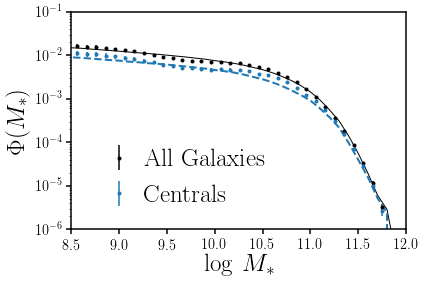

In [23]:
fig = plt.figure()
sub = fig.add_subplot(111)

sub.plot(smf_sim[0], smf_sim[1], c='k', lw=1)
sub.errorbar(marr, phi, phi_err, fmt='.k', label='All Galaxies')

sub.plot(smf_censim[0], smf_censim[1], c='C0', lw=2, ls='--')
sub.errorbar(marr, fcen * phi, phi_err, fmt='.C0', label='Centrals')

sub.legend(loc='lower left', handletextpad=0., fontsize=25)
sub.set_xlabel('$\log\,M_*$', fontsize=25)
sub.set_xlim([8.5, 12.])
sub.set_ylabel('$\Phi(M_*)$', fontsize=25)
sub.set_yscale('log')
sub.set_ylim([1e-6, 1e-1])